In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [2]:
dataset = pd.read_csv('clean_lending_club_df.csv')

In [3]:
dataset.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_fico_range_low,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,0,5000,5000,4975.0,36.0,83.7,162.87,B,B2,1.0,...,740,0.0,12,12,38.0,1.0,8.0,1.0,7.0,9.0
1,1,2500,2500,2500.0,60.0,9.4,59.83,C,C4,10.0,...,0,0.0,12,12,24.0,4.0,10.0,4.0,7.0,9.0
2,2,2400,2400,2400.0,36.0,98.5,84.33,C,C5,1.0,...,715,0.0,12,12,22.0,11.0,9.0,6.0,7.0,9.0
3,3,10000,10000,10000.0,36.0,21.0,339.31,C,C1,1.0,...,600,0.0,12,12,27.0,2.0,8.0,1.0,7.0,4.0
4,4,3000,3000,3000.0,60.0,53.9,67.79,B,B5,0.0,...,690,0.0,12,12,27.0,1.0,7.0,9.0,7.0,9.0


In [4]:
# Unwanted Column
dataset = dataset.drop('Unnamed: 0',axis=1)

In [5]:
dataset.loan_status = dataset.loan_status.replace(['In Grace Period','Late (31-120 days)','Late (16-30 days)','Default'],'Current')

In [6]:
num_col = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','fico_range_low','fico_range_high',
           'open_acc','revol_util','total_acc','out_prncp','out_prncp_inv','total_rec_prncp','total_rec_late_fee','recoveries',
           'collection_recovery_fee','last_fico_range_high','last_fico_range_low','earliest_cr_line_year','annual_inc']
cat_col = list(dataset.drop(num_col,axis=1).columns)
cat_col.remove('loan_status')
dataset[num_col].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,fico_range_low,fico_range_high,open_acc,revol_util,...,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,earliest_cr_line_year,annual_inc
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,...,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253500e+04
mean,11089.722581,10821.585753,10139.830603,49.117119,322.623063,13.373043,713.052545,717.052545,9.345762,49.117119,...,11.849562,11.815891,9664.271346,1.515321,100.307353,13.956737,689.305302,676.382744,26.191701,6.913711e+04
std,7410.938391,7146.914675,7131.686447,28.334247,208.927216,6.726315,36.188439,36.188439,4.497310,28.334247,...,125.376563,125.061859,7087.469380,7.827800,718.078716,159.621861,80.202882,119.011555,7.415249,6.409336e+04
min,500.000000,500.000000,0.000000,0.000000,15.670000,0.000000,610.000000,614.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-45.000000,1.896000e+03
25%,5200.000000,5000.000000,4950.000000,25.800000,165.520000,8.200000,685.000000,689.000000,6.000000,25.800000,...,0.000000,0.000000,4400.000000,0.000000,0.000000,0.000000,644.000000,640.000000,22.000000,4.000000e+04
50%,9700.000000,9600.000000,8500.000000,49.600000,277.690000,13.470000,710.000000,714.000000,9.000000,49.600000,...,0.000000,0.000000,8000.000000,0.000000,0.000000,0.000000,699.000000,695.000000,25.000000,5.900000e+04
75%,15000.000000,15000.000000,14000.000000,72.600000,428.180000,18.680000,740.000000,744.000000,12.000000,72.600000,...,0.000000,0.000000,13425.000000,0.000000,0.000000,0.000000,744.000000,740.000000,30.000000,8.250000e+04
max,35000.000000,35000.000000,35000.000000,119.000000,1305.190000,29.990000,825.000000,829.000000,47.000000,119.000000,...,3555.850000,3553.300000,35000.020000,209.000000,29623.350000,7002.190000,850.000000,845.000000,54.000000,6.000000e+06


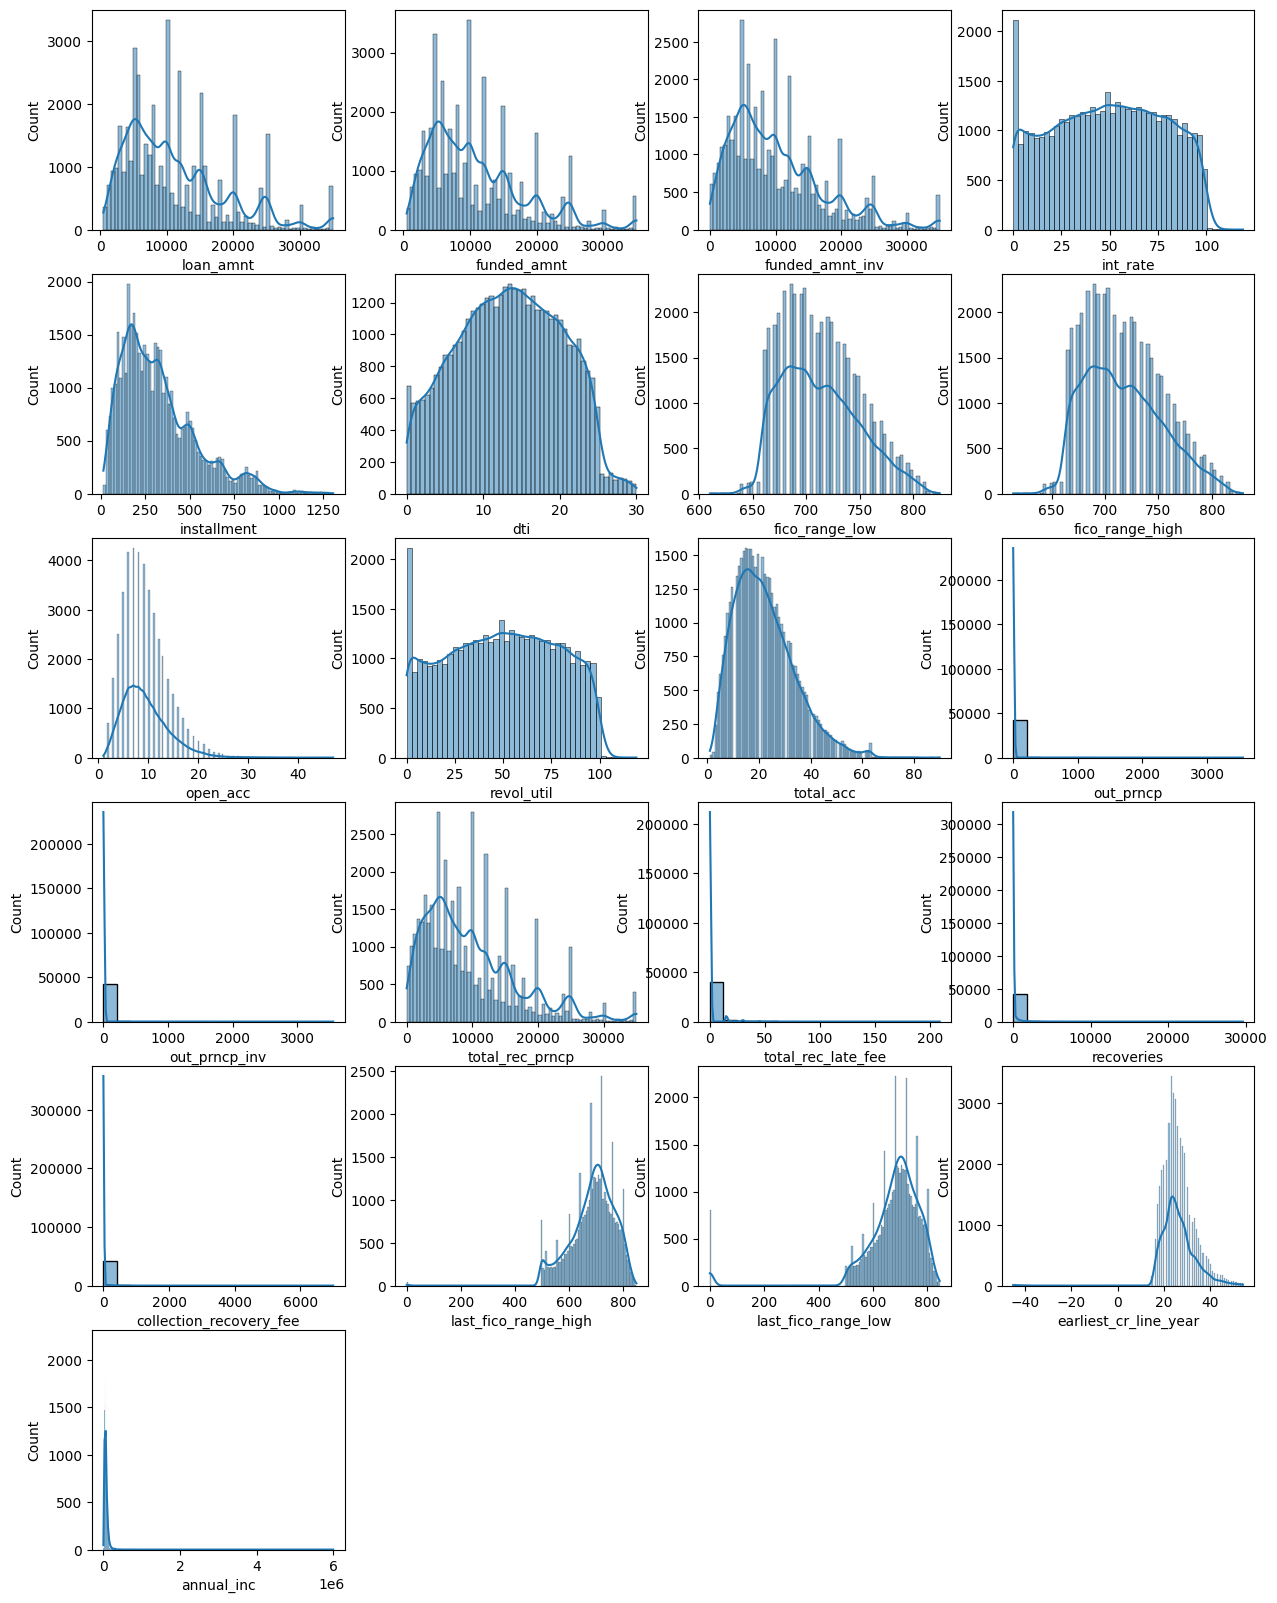

In [7]:
if len(num_col)%2 !=0:
  r =len(num_col)//4+1
else:
  r =len(num_col)//4
  
plt.figure(figsize=(15,20))
for i in range(len(num_col)):
  a=i+1
  if a<=len(num_col):
    plt.subplot(r,4,a)
    sns.histplot(dataset[num_col[i]],kde=True)
    plt.xlabel(num_col[i])



1.   We observe that the 10,000 dollers is the common loan amount taken by the customers
2.   We have got to know that the customers are interested to have less interest rate
3.   The montly installments are minimal due to the small amount of loan taken by the borrower are the tenure period is high. 
4.   More number of borrowers are having less than 20 acoounts in their credit file.




- Loan Amount, Funded Amount, Funded Amount inv are looking same so we need to find the correlation of them.
- Fico range low and fic range high are also same need to find the correlation of it.
- last Fico range low and last fic range high are also same need to find the correlation of it.

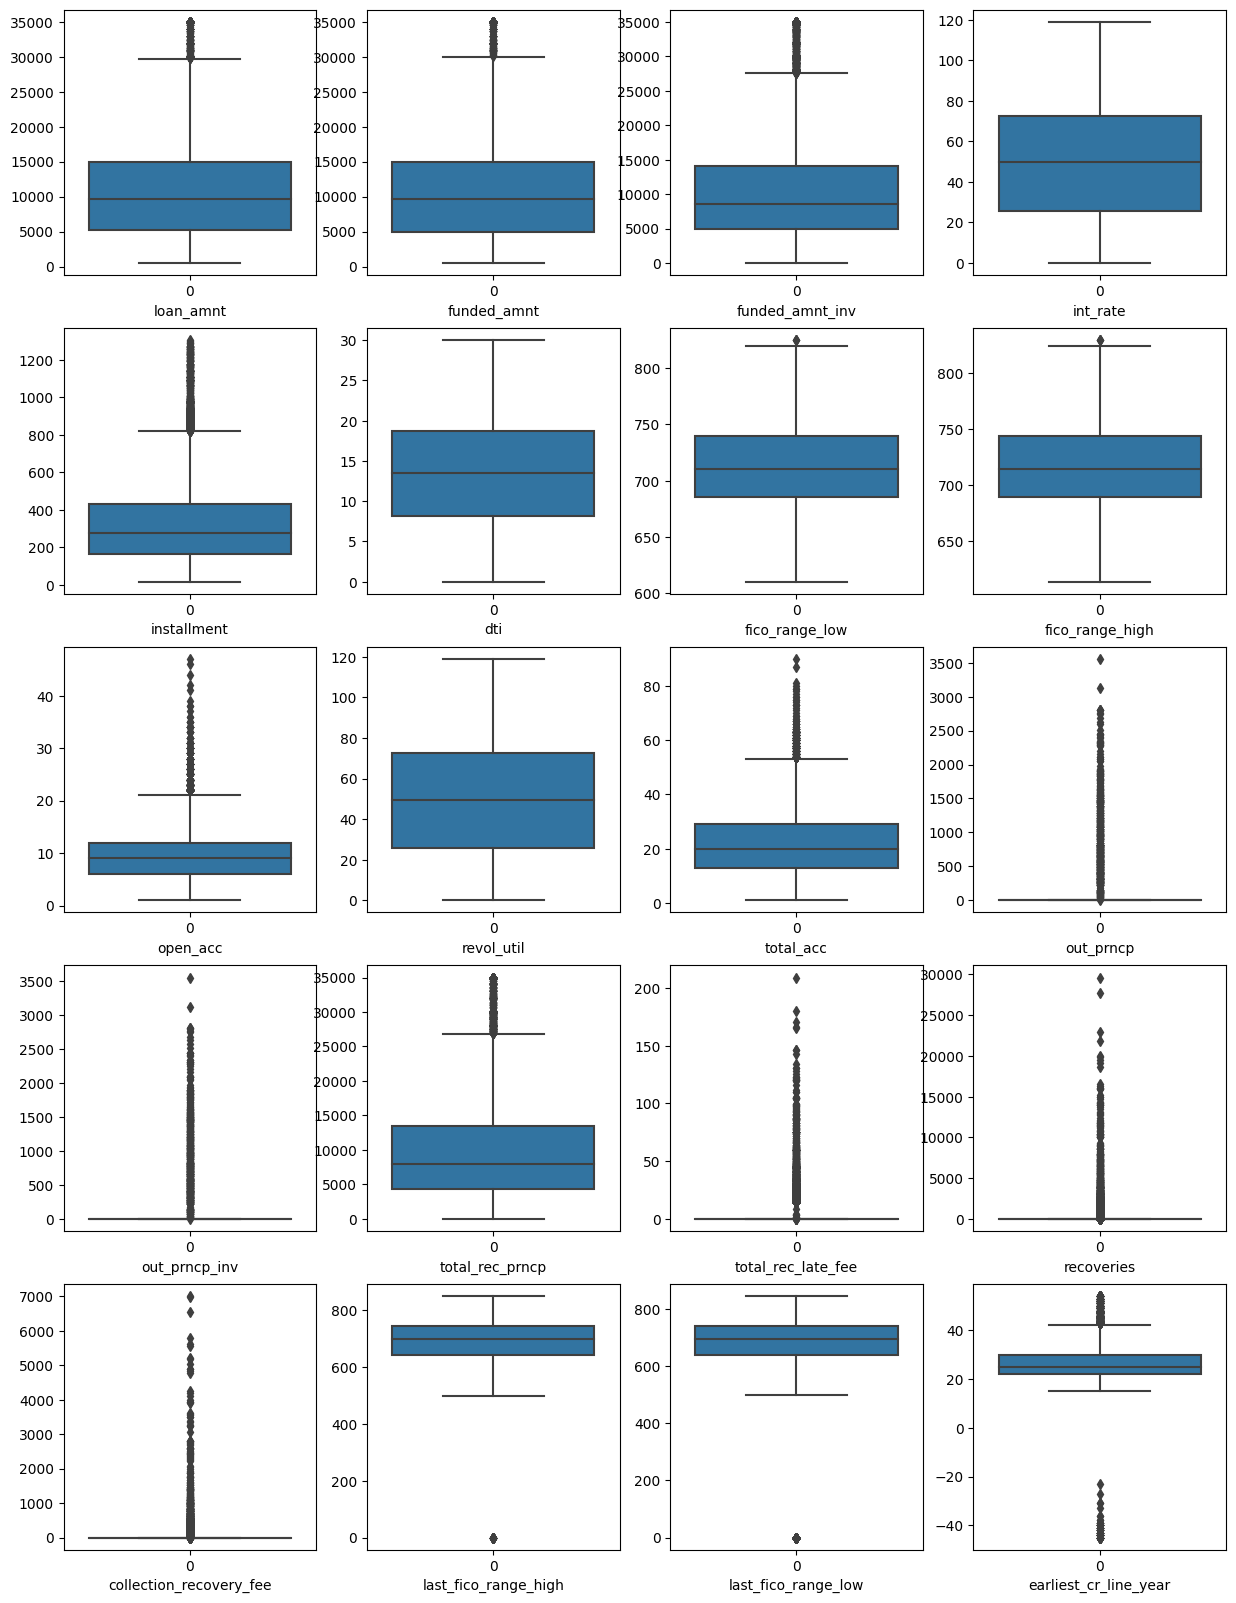

In [8]:
plt.figure(figsize=(15,20))
for i in range(len(num_col)):
  a=i+1
  if a<=20:
    plt.subplot(5,4,a)
    sns.boxplot(dataset[num_col[i]])
    plt.xlabel(num_col[i])

Installment, out prncp, out prncp inv, total rec late fee, recoveries, collection recovery fee is having outliers

In [9]:
dataset.purpose = dataset.purpose.fillna('other')
dataset.purpose.value_counts(dropna=False)

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

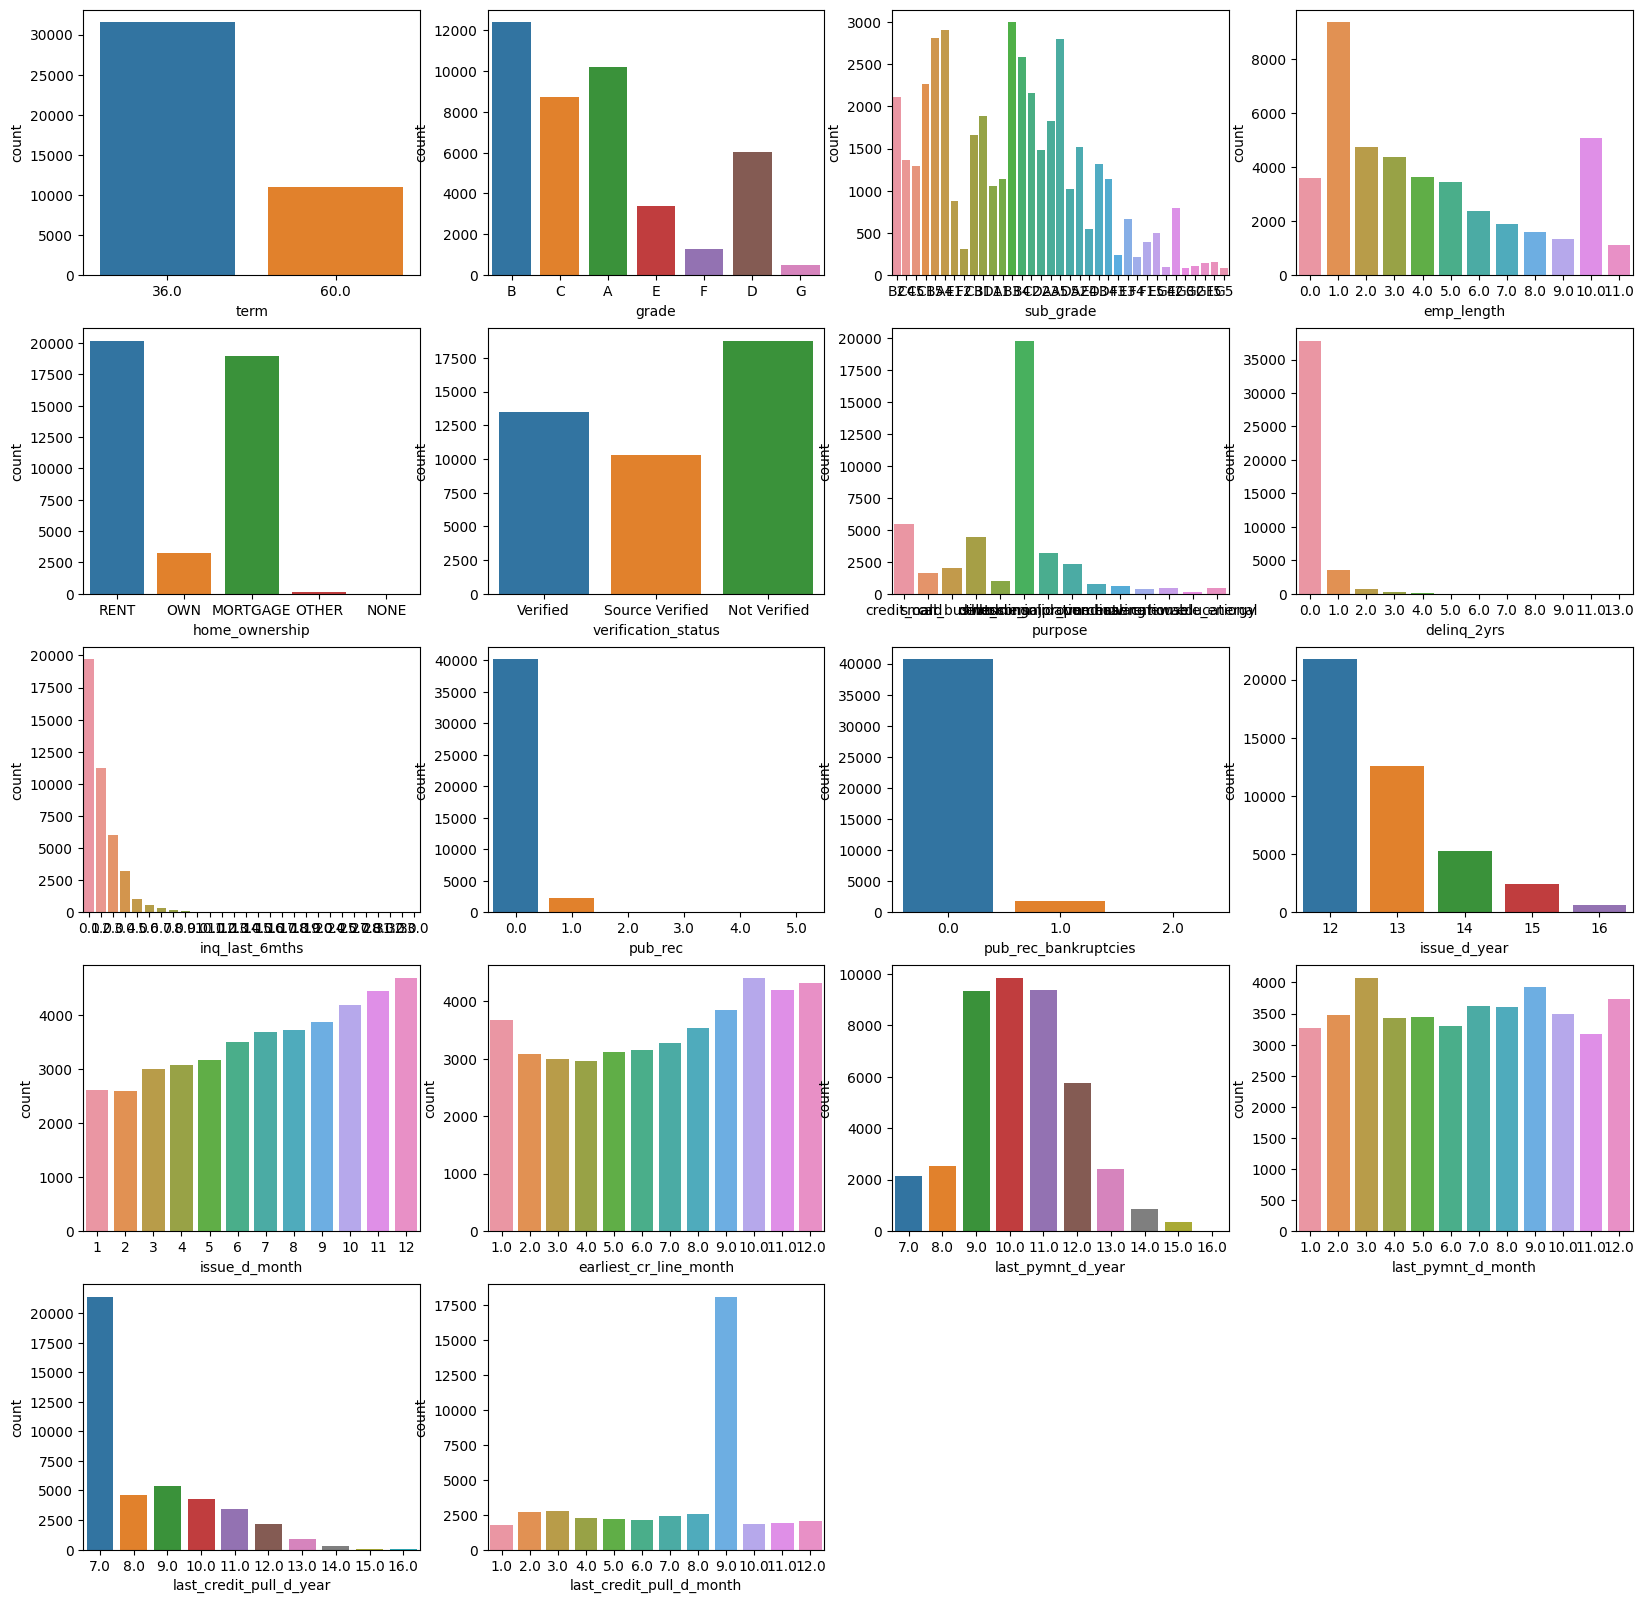

In [10]:

plt.figure(figsize=(20,20))
for i in range(len(cat_col)):
  a=i+1
  if a<=20:
    plt.subplot(5,4,a)
    sns.countplot(data = dataset, x=cat_col[i])
    plt.xlabel(cat_col[i])

-The most number of borrower payed loan in 36 months

-We can say that the grade A and B are more likely to take the loan.

-The loans got approved for the employees who are having 10+ years of employee length.

-More number of loans are taken by the people who leaves in rented home and mortgage.

-Most number of applications are not verified there income source.

-Most number of borrowes are requested loan for debt consolidation and credit card.

-As more number of zeros in public record and public record bankruptcies.

-More number of loans are issued in the year 2012 and in the month 11th and 12th.

In [11]:
dataset.loan_status.value_counts(dropna=False)
dataset.loan_status = dataset.loan_status.replace('Does not meet the credit policy. Status:Fully Paid','DNMCP Status:FP')
dataset.loan_status = dataset.loan_status.replace('Does not meet the credit policy. Status:Charged Off','DNMCP Status:CO')

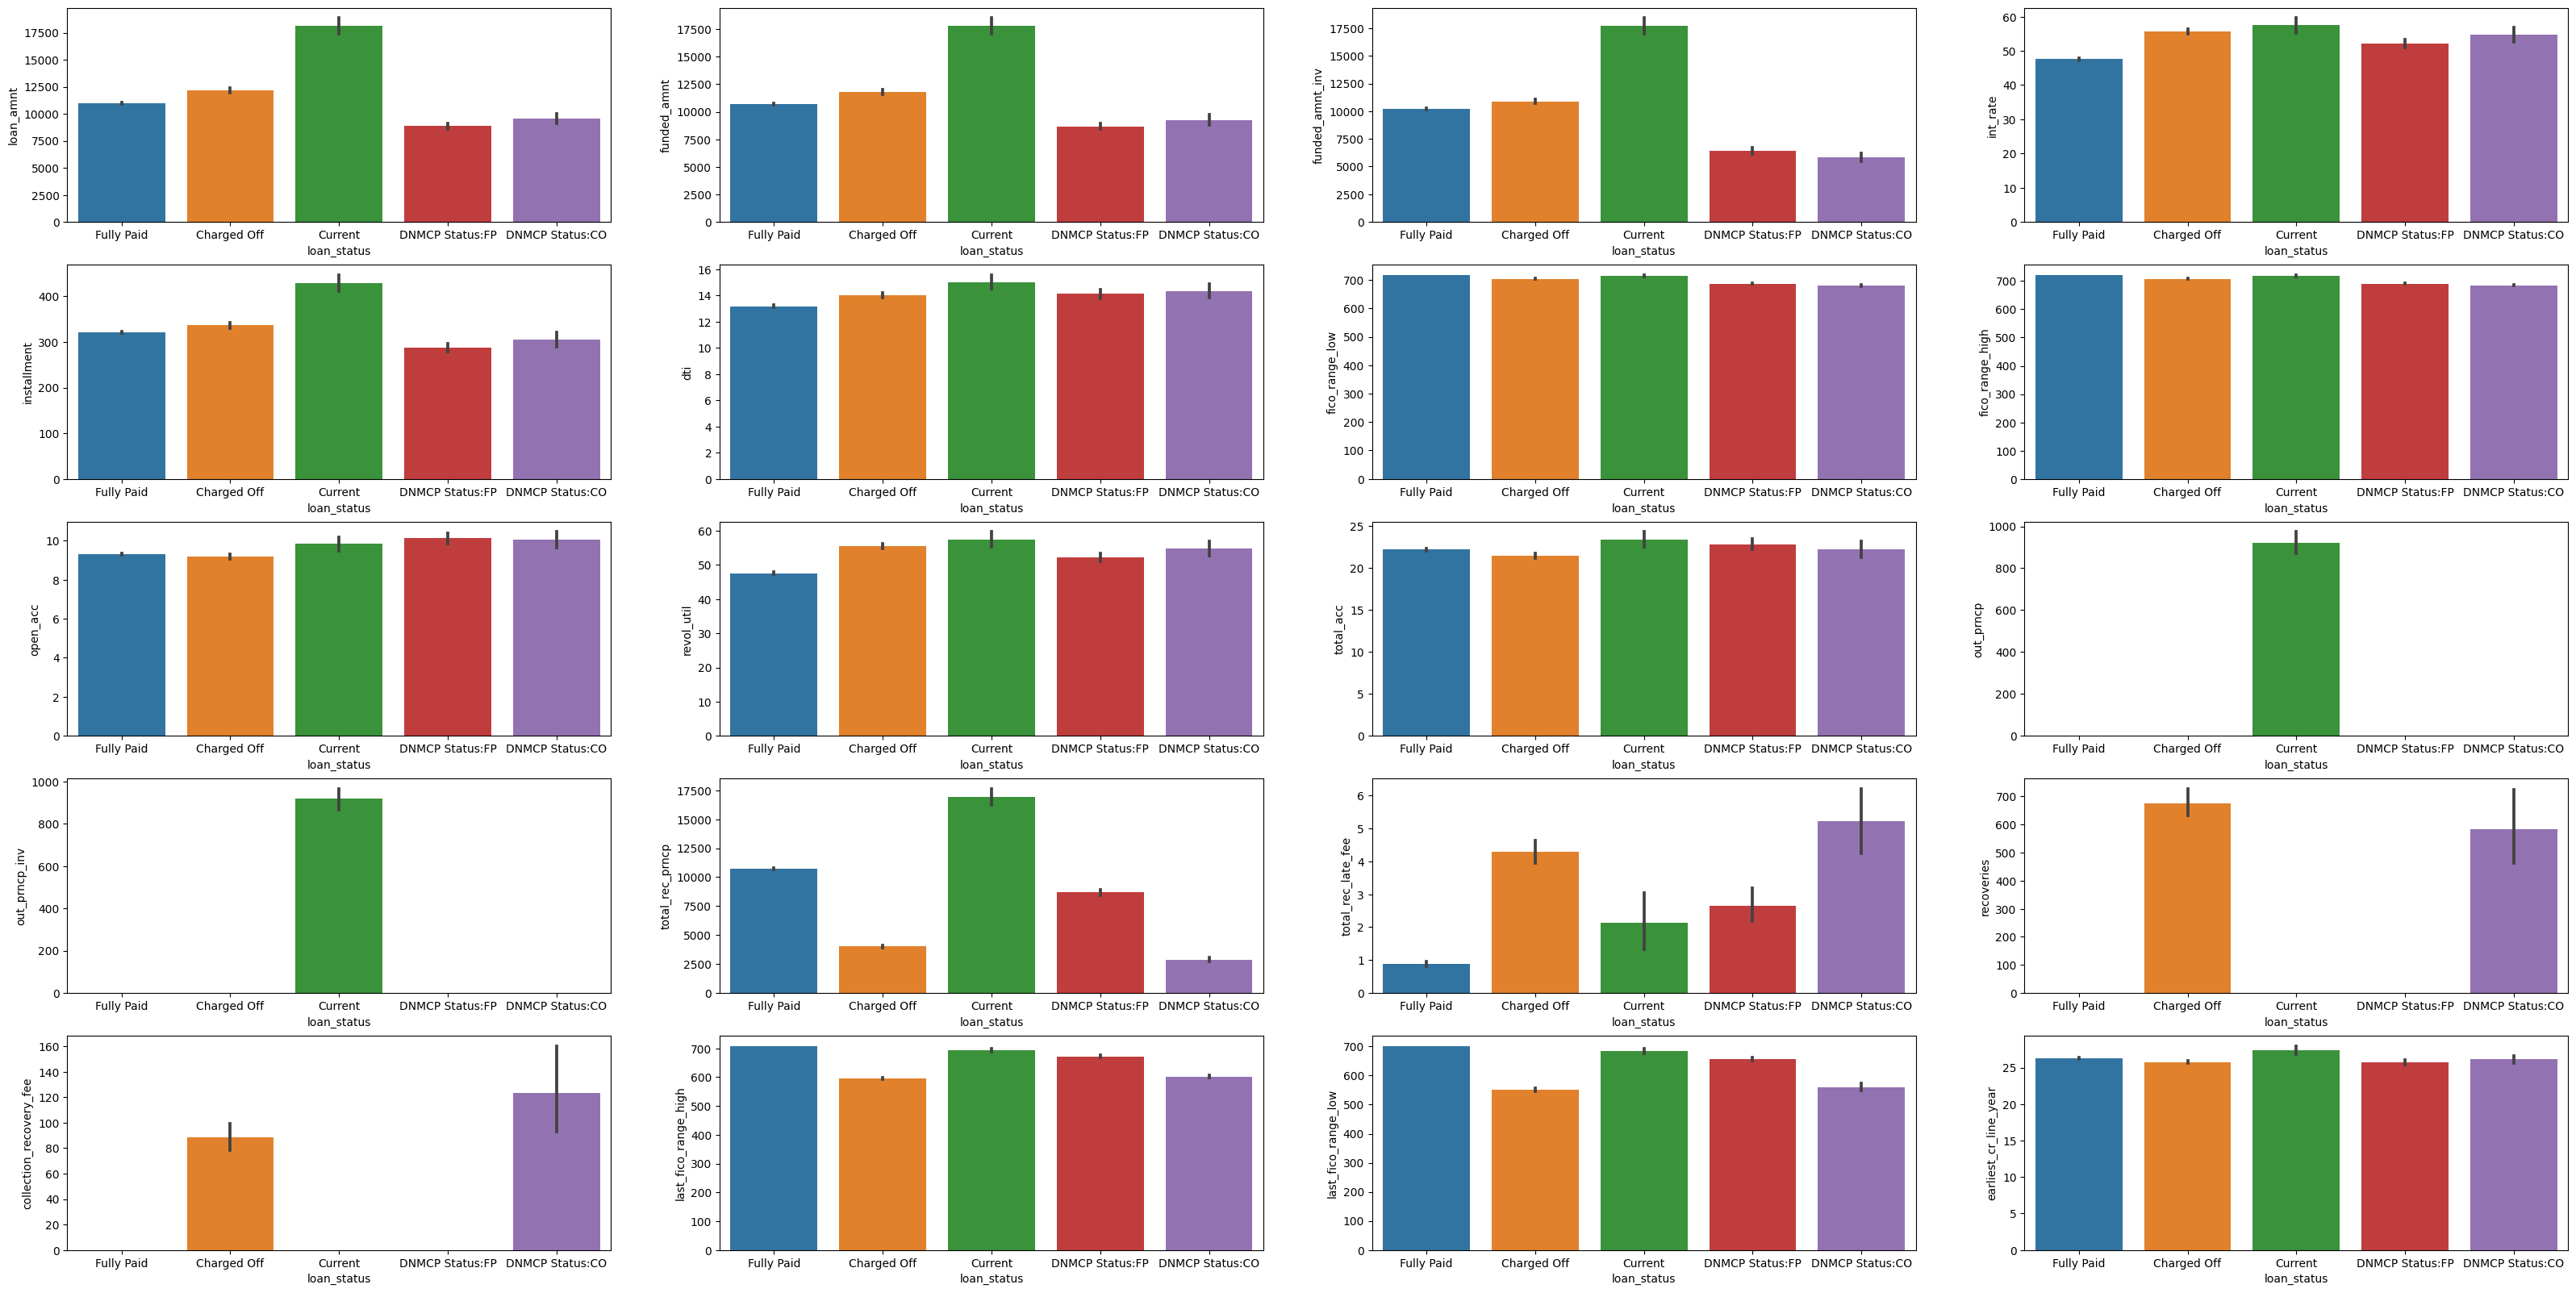

In [12]:
plt.figure(figsize=(40,20))
for i in range(len(num_col)):
  a=i+1
  if a<=20:
    plt.subplot(5,4,a)
    g = sns.barplot(y = dataset[num_col[i]],x=dataset.loan_status)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
dataset[cat_col] = pd.DataFrame(dataset[cat_col].apply(le.fit_transform),columns=cat_col)

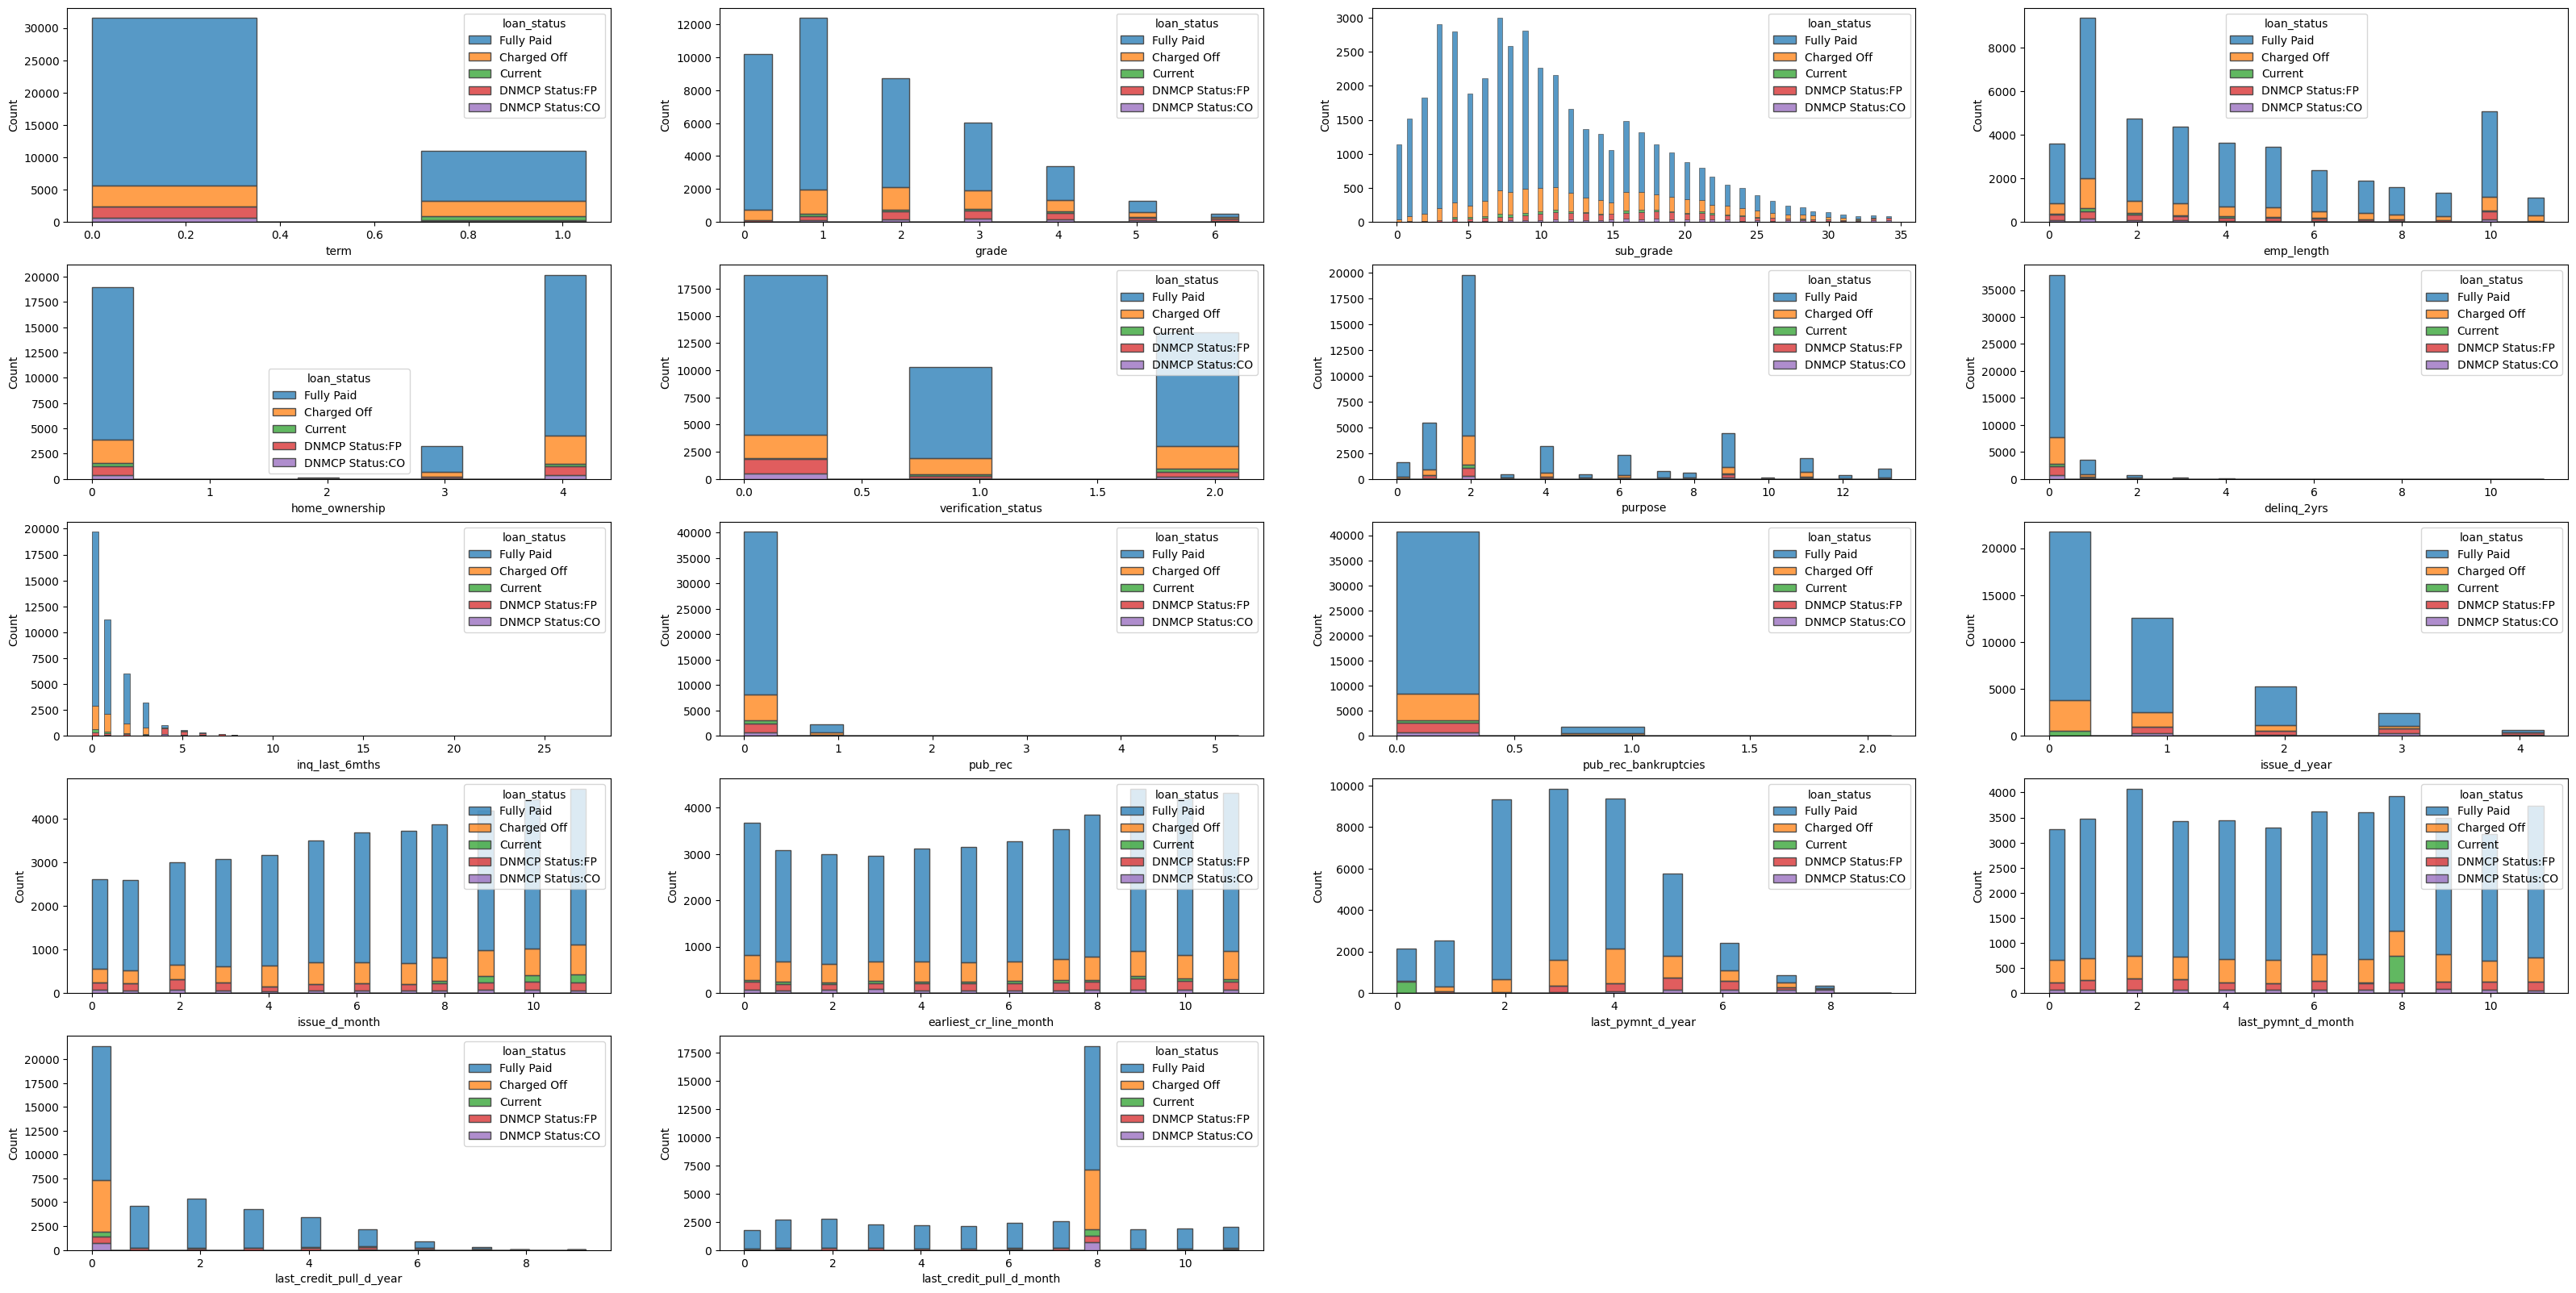

In [15]:

plt.figure(figsize=(40,20))
for i in range(len(cat_col)):
  a=i+1
  if a<=20:
    plt.subplot(5,4,a)
    sns.histplot(data=dataset,x = dataset[cat_col[i]], multiple="stack",hue='loan_status',edgecolor=".3",binwidth=0.35)

<ipython-input-16-27e72b929c44>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

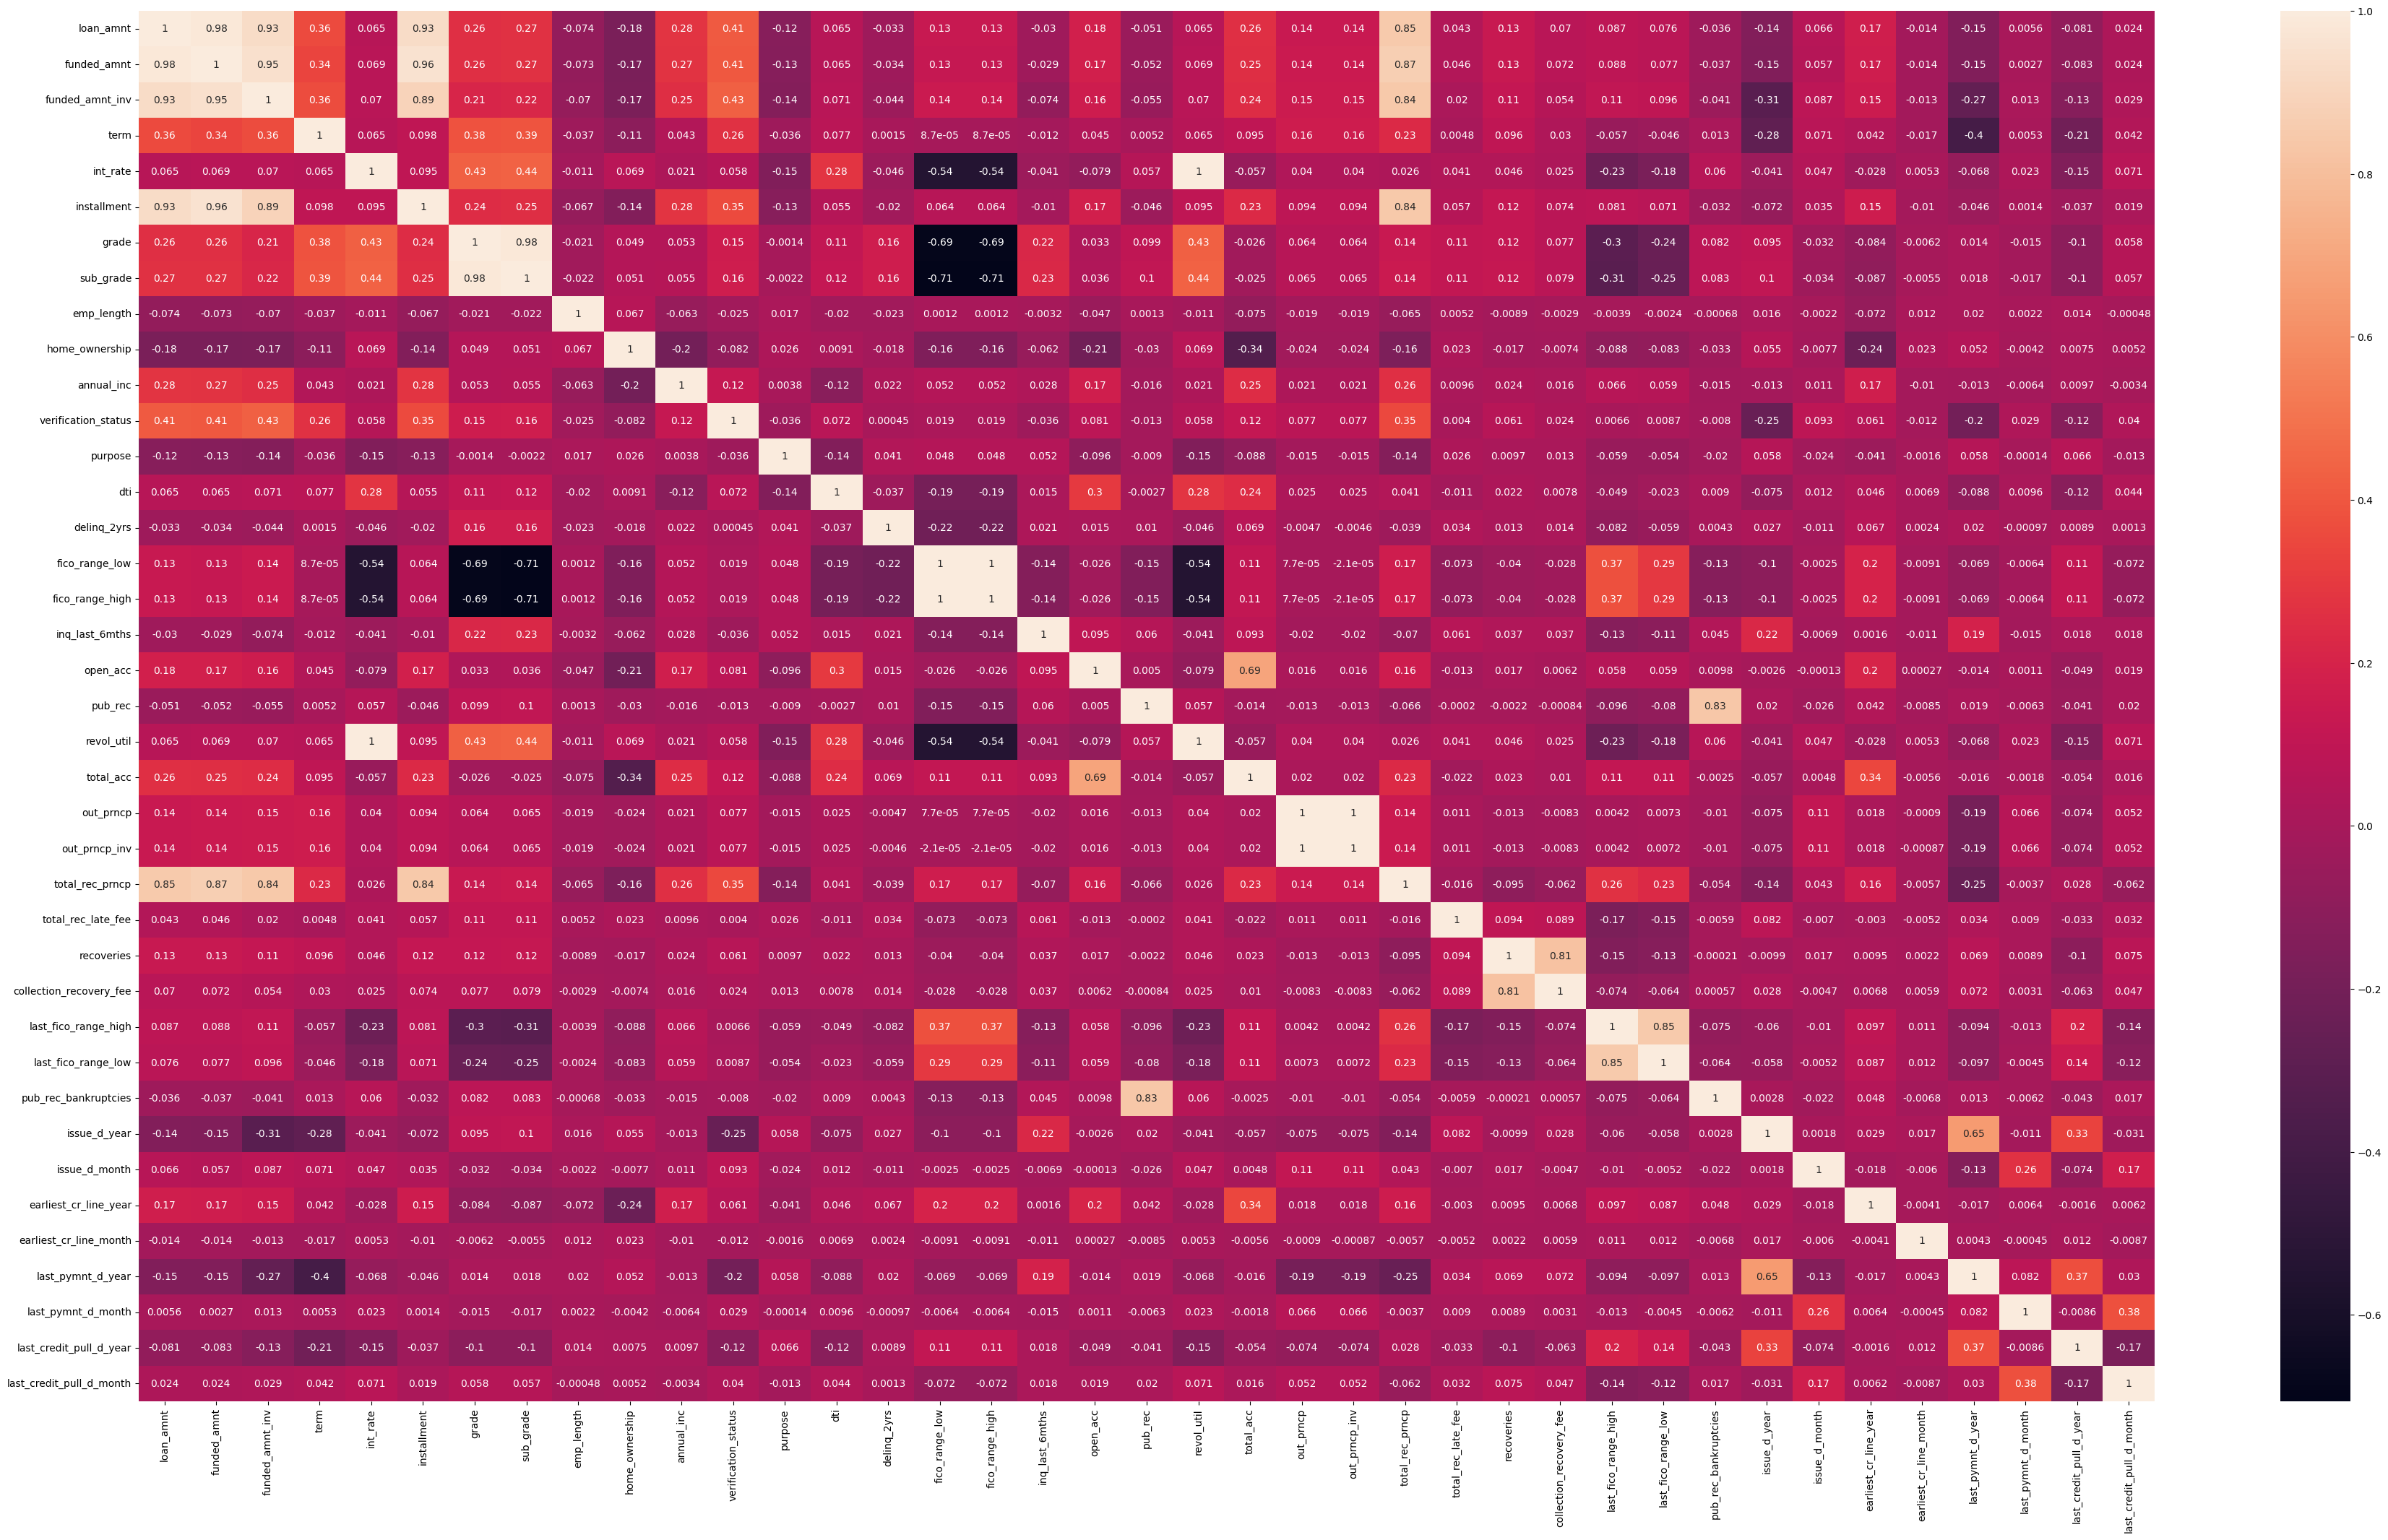

In [16]:
plt.figure(figsize=(45,25))
sns.heatmap(dataset.corr(),annot=True)

-The Correlation between loan amount, funded amount and funded amount inv

-Installment is also in correlation with loan amount 

-interest rate and revol util

-Fico_range_high and low are in correlation

-out_prnco_inv and out_prncp are also


In [17]:
dataset.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_fico_range_high',
       'last_fico_range_low', 'pub_rec_bankruptcies', 'issue_d_year',
       'issue_d_month', 'earliest_cr_line_year', 'earliest_cr_line_month',
       'last_pymnt_d_year', 'last_pymnt_d_month', 'last_credit_pull_d_year',
       'last_credit_pull_d_month'],
      dtype='object')

In [18]:
dataset = dataset.drop(['funded_amnt', 'funded_amnt_inv','installment', 'sub_grade','revol_util', 'fico_range_low','out_prncp_inv'],axis=1)

In [19]:
dataset.shape

(42535, 33)

# Model Building

In [21]:
dataset = dataset.apply(le.fit_transform)

In [22]:
X = dataset.drop(['loan_status'],axis=1)
y = dataset.loan_status

In [23]:
y.value_counts(dropna=False)

4    33586
0     5653
3     1988
2      761
1      547
Name: loan_status, dtype: int64

In [24]:
from sklearn.model_selection import GridSearchCV

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# By using Hyperparameter Tunning
parm = {"max_iter":list(range(100,1000,200))}

grid = GridSearchCV(lr,param_grid=parm,cv=5, verbose=True, n_jobs=-1)
grid.fit(X,y)
print("Parameters: ",grid.best_params_)
print("Score: ",grid.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Parameters:  {'max_iter': 900}
Score:  0.9331609262959916


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()

cross_val = cross_val_score(gnb,X,y,cv=5)
print("Mean Accuracy: ",round(cross_val.mean()*100,3))

Mean Accuracy:  79.864


KNN

In [27]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

mean_accurate = np.zeros(20)

for i in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X,y)
  mean_accurate[i-1]=metrics.accuracy_score(y,knn.predict(X))

print("Mean Accuracy: ",np.mean(mean_accurate))

Mean Accuracy:  0.9079029034912425


Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

param = {'max_depth':list(range(5,25,5)),'criterion' : ['gini','entropy'],'min_samples_split': [2, 3, 5, 7, 9],'min_samples_leaf': [1,5,8,11]}

grid = GridSearchCV(dt,param_grid=param,cv=5)
grid.fit(X,y)
print("Score: ",grid.best_score_)
print("paramters: ",grid.best_params_)

Score:  0.824638532972846
paramters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 11, 'min_samples_split': 2}


Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

param={'max_depth': list(range(5,25,5)),'n_estimators': list(range(100,1000,200))}

grid = GridSearchCV(rf,param_grid=param,cv=5)
grid.fit(X,y)

print("Score: ",grid.best_score_)
print("Paramters: ",grid.best_params_)

Score:  0.9025978605854001
Paramters:  {'max_depth': 5, 'n_estimators': 100}


***Model Performance***

**Logistic Regression -** 0.93

**Naive Bayes -** 0.79

**KNN -** 0.90

**Decision Tree -** 0.82

**Random Forest -** 0.89

In [30]:
# As the Logist Score is more we are going with it
# After Hyperparamter Tunning we have got to know that the max_iter = 900 is the best parameter 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)


l = LogisticRegression(max_iter=900).fit(X_train,y_train)
print(classification_report(y_test,l.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1653
           1       1.00      0.96      0.98       170
           2       0.87      0.06      0.11       214
           3       0.80      0.16      0.27       582
           4       0.94      1.00      0.97     10142

    accuracy                           0.93     12761
   macro avg       0.90      0.62      0.65     12761
weighted avg       0.93      0.93      0.91     12761



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
